<a href="https://colab.research.google.com/github/a-proenca/LAD/blob/main/LAD_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Laboratório de Análise de Dados
## Elaborado por:

# André Proença - 2016018783

# Bruno Coutinho - 2014009997

#Imports

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#FUNCOES


In [ ]:
def ler_emel():
    emel_filepath = '/content/drive/MyDrive/LAD_2023/EMEL'
    ficheiros = ['EMEL_CONDICIONAMENTOS_TRANSITO_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(emel_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_eixos_vodafone():
  #'PGIL_VODAFONE_EIXOS_2022_01.csv'
    #Nao incluimos fevereiro nem março tem dados em falta
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2022'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2022_04.csv','PGIL_VODAFONE_EIXOS_2022_05.csv','PGIL_VODAFONE_EIXOS_2022_06.csv','PGIL_VODAFONE_EIXOS_2022_07.csv','PGIL_VODAFONE_EIXOS_2022_08.csv','PGIL_VODAFONE_EIXOS_2022_09.csv','PGIL_VODAFONE_EIXOS_2022_10.csv','PGIL_VODAFONE_EIXOS_2022_11.csv','PGIL_VODAFONE_EIXOS_2022_12.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_quadriculas_vodafone_bruto():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE_QUADRICULAS'
    ficheiros = ['VODAFONE_QUADRICULAS_BRUTO_UTF8.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_abril.csv', 'grelhas_maio.csv', 'grelhas_junho.csv', 'grelhas_julho.csv', 'grelhas_agosto.csv', 'grelhas_setembro.csv', 'grelhas_outubro.csv', 'grelhas_novembro.csv', 'grelhas_dezembro.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone_paco():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_outubro_paco.csv', 'grelhas_novembro_paco.csv', 'grelhas_dezembro_paco.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result



def ler_waze():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/WAZE JAMS'
    ficheiros = ['waze_2022_ate_2022-07-18.csv','waze_2022_desde_2022-07-18.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def plot_outlier_detection(df, column_name):

    # boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column_name])
    plt.title(f'Boxplot para Detecção de Outliers em {column_name}')
    plt.ylabel('Valores')
    plt.show()

    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.title(f'Scatter Plot para Detecção de Outliers em {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Calculando o limite superior e inferior para outliers (exemplo: 1.5*IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    plt.hlines([limite_superior, limite_inferior], xmin=df.index.min(), xmax=df.index.max(), colors='r')
    plt.show()

def plot_histogram_with_count(df, x_column):
     # Hist
    sns.histplot(data=df, x=x_column, stat='count')
    plt.title(f'Histograma de Contagem para {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Contagem')
    plt.show()

#FUNCAO FOI USADA PREVIAMENTE PARA FILTRAR AS HORAS DE PONTA E TORNAR OS FICHEIROS MAIS
def filtrar_horas(df, coluna_datetime):
    """
    Filtra um DataFrame para manter apenas as linhas onde os horários em 'coluna_datetime'
    estão entre 7-10 da manhã e 17-20h.

    Parâmetros:
    df (pandas.DataFrame): DataFrame a ser filtrado.
    coluna_datetime (str): Nome da coluna que contém os dados de data e hora.

    Retorna:
    pandas.DataFrame: DataFrame filtrado.
    """
    # Garantir que a coluna Datetime está no formato correto
    df[coluna_datetime] = pd.to_datetime(df[coluna_datetime])

    # Filtrar para manter as horas entre 7-10 da manhã e 17-20h
    df_filtrado = df[((df[coluna_datetime].dt.hour >= 7) & (df[coluna_datetime].dt.hour < 10)) |
                     ((df[coluna_datetime].dt.hour >= 17) & (df[coluna_datetime].dt.hour < 20))]

    return df_filtrado

def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return None


In [ ]:
data_vodafone_eixos = ler_eixos_vodafone()

In [ ]:
data_vodafone_eixos

,id_eixo_viario,Eixo,Datetime,C12,C13
0,1,Ponte 25 Abril,2022-04-01T00:00:00.000Z,2.050000,7.070000
1,1,Ponte 25 Abril,2022-04-01T00:15:00.000Z,8.460000,19.400000
2,1,Ponte 25 Abril,2022-04-01T00:30:00.000Z,13.430000,13.430000
3,1,Ponte 25 Abril,2022-04-01T00:45:00.000Z,7.560000,7.560000
4,1,Ponte 25 Abril,2022-04-01T01:00:00.000Z,0.000000,0.000000
...,...,...,...,...,...
283701,11,IC2 (Sacavém),2022-12-31T22:45:00.000Z,54.040001,38.009998
283702,11,IC2 (Sacavém),2022-12-31T23:00:00.000Z,9.320000,11.220000
283703,11,IC2 (Sacavém),2022-12-31T23:15:00.000Z,1.260000,6.720000
283704,11,IC2 (Sacavém),2022-12-31T23:30:00.000Z,0.000000,0.000000


In [ ]:
#converter valores em datetime
data_vodafone_eixos = data_vodafone_eixos.drop(columns='id_eixo_viario')
data_vodafone_eixos['Datetime'] = pd.to_datetime(data_vodafone_eixos['Datetime'], format='%Y.%m.%d %H:%M:%S')
data_vodafone_eixos = filtrar_horas(data_vodafone_eixos, 'Datetime')

In [ ]:
for column in data_vodafone_eixos.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(data_vodafone_eixos.index, data_vodafone_eixos[column], marker='o', linestyle='-', label=column)
    plt.title(f'Gráfico de Série Temporal - {column}')
    plt.xlabel('Tempo')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()

NameError: name 'df_vascodagama' is not defined

<Axes: xlabel='Datetime'>

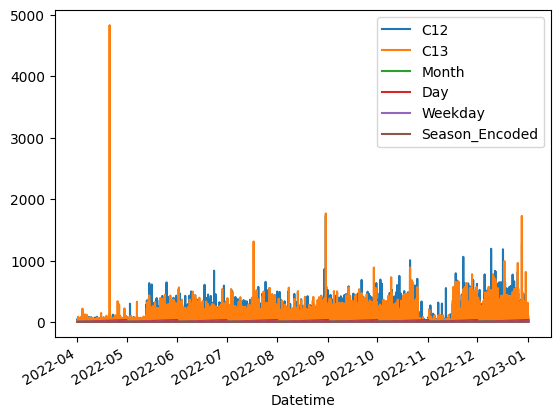

In [ ]:
df.plot()

In [ ]:
#########################################--------------------------------------TEST-------------------##################################

In [ ]:
df = data_vodafone_eixos

In [ ]:
df = df.drop('Eixo', axis=1)
df=df.set_index('Datetime')

In [ ]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
#Create sin and cos based on time

day = 60*60*24
year = 365.2425*day

df['Day sin'] = np.sin(df['Seconds']* (2*np.pi / day))
df['Day cos'] = np.cos(df['Seconds']* (2*np.pi / day))
df['Year sin'] = np.sin(df['Seconds']* (2*np.pi / day))
df['Year cos'] = np.cos(df['Seconds']* (2*np.pi / day))

df = df = df.drop('Seconds', axis=1)

In [ ]:
df

,C12,C13,Day sin,Day cos,Year sin,Year cos
Datetime,,,,,,
2022-04-01 07:00:00+00:00,43.970001,28.900000,0.965926,-0.258819,0.965926,-0.258819
2022-04-01 07:15:00+00:00,39.820000,31.320000,0.946930,-0.321439,0.946930,-0.321439
2022-04-01 07:30:00+00:00,96.309998,58.720001,0.923880,-0.382683,0.923880,-0.382683
2022-04-01 07:45:00+00:00,55.790001,29.459999,0.896873,-0.442289,0.896873,-0.442289
2022-04-01 08:00:00+00:00,69.180000,25.959999,0.866025,-0.500000,0.866025,-0.500000
...,...,...,...,...,...,...
2022-12-31 18:45:00+00:00,232.360001,239.389999,-0.980785,0.195090,-0.980785,0.195090
2022-12-31 19:00:00+00:00,195.490005,120.790001,-0.965926,0.258819,-0.965926,0.258819
2022-12-31 19:15:00+00:00,219.899994,211.419998,-0.946930,0.321439,-0.946930,0.321439


In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
  predictions(model.predict(X).flatten())
  df = pd.Dataframe(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y,predictions)


In [ ]:
def df_to_X_y(df, window_size):
  #window size é o numero de intervalos que queremos mostrar
  df_as_np = df.to_numpy()
  X = []
  Y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][1] #predict a c13
    Y.append(label)
  return np.array(X), np.array(Y)

In [ ]:
X, Y = df_to_X_y(df,384)
X.shape , Y.shape

((70445, 384, 6), (70445,))

In [ ]:
#Train 80% , Test 10% Validation 10%

from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape

#Stardarization
c12_train_mean = np.mean(X_train[:, :, 0])
c12_train_std = np.std(X_train[:, :, 0])
c13_train_mean = np.mean(X_train[:, :, 1])
c13_train_std = np.std(X_train[:, :, 1])




In [ ]:
def preprocess_c12(X):
  X[:, :, 0] = (X[:, :, 0] - c12_train_mean) / c12_train_std
  return X


def preprocess_c13(X):
  X[:, :, 1] = (X[:, :, 1] - c13_train_mean) / c13_train_std
  return X

In [ ]:
preprocess_c12(X_train)
preprocess_c12(X_val)
preprocess_c12(X_test)
preprocess_c13(X_train)
preprocess_c13(X_val)
preprocess_c13(X_test)

array([[[ 9.52528312e-01,  7.90201506e-01,  7.51839807e-01,
         -6.59345815e-01,  7.51839807e-01, -6.59345815e-01],
        [ 7.34907195e-01,  7.23179544e-01,  7.07106781e-01,
         -7.07106781e-01,  7.07106781e-01, -7.07106781e-01],
        [ 3.61762615e-01,  6.26787633e-01,  6.59345815e-01,
         -7.51839807e-01,  6.59345815e-01, -7.51839807e-01],
        ...,
        [ 8.38651724e-01,  6.91791221e-01,  8.66025404e-01,
         -5.00000000e-01,  8.66025404e-01, -5.00000000e-01],
        [ 1.11575952e+00,  1.61743155e+00,  8.31469612e-01,
         -5.55570233e-01,  8.31469612e-01, -5.55570233e-01],
        [ 1.34612329e+00,  6.55948800e-01,  7.93353340e-01,
         -6.08761429e-01,  7.93353340e-01, -6.08761429e-01]],

       [[-6.12341799e-01, -7.69189351e-01,  5.55570233e-01,
         -8.31469612e-01,  5.55570233e-01, -8.31469612e-01],
        [-4.17036081e-01, -7.49771777e-01, -9.65925826e-01,
         -2.58819045e-01, -9.65925826e-01, -2.58819045e-01],
        [-5.41790

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(InputLayer((384,6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18705 (73.07 KB)
Trainable params: 18705 (73.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_val,Y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1762/1762 [==============================] - 37s 19ms/step - loss: 39195.8750 - root_mean_squared_error: 197.9795 - val_loss: 33925.8711 - val_root_mean_squared_error: 184.1898
Epoch 2/10
1762/1762 [==============================] - 31s 17ms/step - loss: 30024.0352 - root_mean_squared_error: 173.2744 - val_loss: 25612.7695 - val_root_mean_squared_error: 160.0399
Epoch 3/10
1762/1762 [==============================] - 30s 17ms/step - loss: 22877.2012 - root_mean_squared_error: 151.2521 - val_loss: 19741.3555 - val_root_mean_squared_error: 140.5039
Epoch 4/10
1762/1762 [==============================] - 33s 18ms/step - loss: 18038.5898 - root_mean_squared_error: 134.3078 - val_loss: 15744.9180 - val_root_mean_squared_error: 125.4788
Epoch 5/10
1762/1762 [==============================] - 32s 18ms/step - loss: 14243.5088 - root_mean_squared_error: 119.3462 - val_loss: 12444.6367 - val_root_mean_squared_error: 111.5555
Epoch 6/10
1762/1762 [==============================] - 30s 

KeyboardInterrupt: 

In [ ]:
plot_predictions(model,x_test,y_test)

In [ ]:
##SHAPEFILES IN PYTHON VIA GEOPANDAS (DEPOIS É PARA PASSAR PARA CIMA)




